In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("datafile/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data[data.columns[(data == 0).any()]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Outcome
0,6,148,72,35,0,33.6,1
1,1,85,66,29,0,26.6,0
2,8,183,64,0,0,23.3,1
3,1,89,66,23,94,28.1,0
4,0,137,40,35,168,43.1,1
...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0
764,2,122,70,27,0,36.8,0
765,5,121,72,23,112,26.2,0
766,1,126,60,0,0,30.1,1


<Axes: >

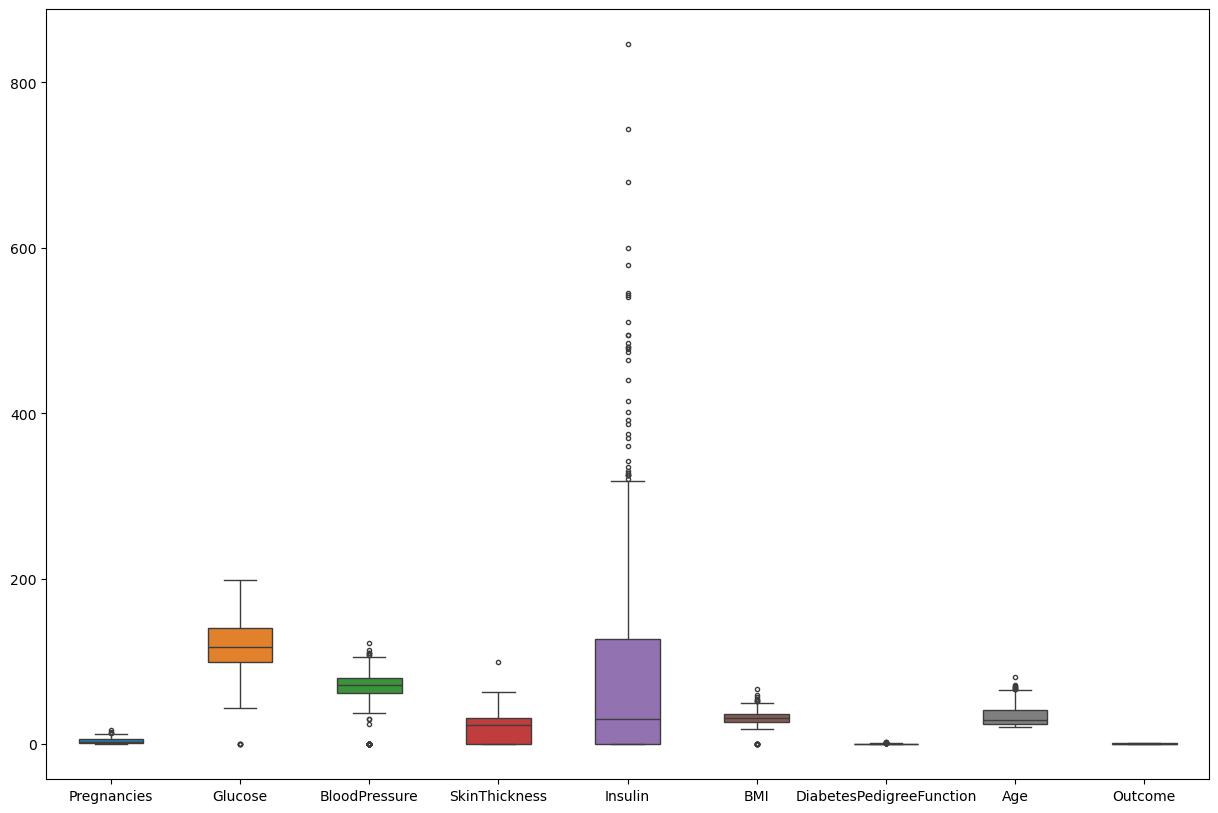

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width=0.5, ax=ax, fliersize=3)

In [7]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].median())  # outliers
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [10]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,30.5,33.6,0.627,50
1,1,85.0,66.0,29.000000,30.5,26.6,0.351,31
2,8,183.0,64.0,20.536458,30.5,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.0,32.9,0.171,63
764,2,122.0,70.0,27.000000,30.5,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.0,26.2,0.245,30
766,1,126.0,60.0,20.536458,30.5,30.1,0.349,47


In [11]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [12]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [14]:
import pickle
##standard Scaling- Standardization
def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #saving the model
    file = open('C:/Users/manal/PycharmProjects/DiabetesLogisticReg/model/standardScalarD.pkl', 'wb')
    pickle.dump(scaler, file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [15]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [16]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [17]:
## Decision tree model training with Hyperparameter tunning
import warnings
warnings.filterwarnings('ignore')

In [18]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [19]:
from sklearn.model_selection import GridSearchCV
classifire = DecisionTreeClassifier()

In [20]:
clf = GridSearchCV(classifire, param_grid=parameter, cv=3, scoring='accuracy', verbose=3)
clf.fit(X_train,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.646 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.703 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.641 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.667 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.719 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.635 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.635 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.641 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, splitte

[CV 3/3] END criterion=gini, max_depth=5, max_features=log2, splitter=best;, score=0.703 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=5, max_features=log2, splitter=random;, score=0.677 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, splitter=random;, score=0.620 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=5, max_features=log2, splitter=random;, score=0.719 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, splitter=best;, score=0.635 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, splitter=best;, score=0.641 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, splitter=best;, score=0.688 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, splitter=random;, score=0.630 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, splitter=random;, score=0.641 total time=   0.0s
[CV

[CV 2/3] END criterion=entropy, max_depth=5, max_features=auto, splitter=best;, score=0.734 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=auto, splitter=best;, score=0.672 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=0.682 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=0.677 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=0.667 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best;, score=0.724 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best;, score=0.755 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best;, score=0.672 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=random;, score=0.630 total time= 

[CV 1/3] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=random;, score=0.682 total time=   0.0s
[CV 2/3] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=random;, score=0.594 total time=   0.0s
[CV 3/3] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=random;, score=0.641 total time=   0.0s
[CV 1/3] END criterion=log_loss, max_depth=4, max_features=log2, splitter=best;, score=0.682 total time=   0.0s
[CV 2/3] END criterion=log_loss, max_depth=4, max_features=log2, splitter=best;, score=0.750 total time=   0.0s
[CV 3/3] END criterion=log_loss, max_depth=4, max_features=log2, splitter=best;, score=0.719 total time=   0.0s
[CV 1/3] END criterion=log_loss, max_depth=4, max_features=log2, splitter=random;, score=0.693 total time=   0.0s
[CV 2/3] END criterion=log_loss, max_depth=4, max_features=log2, splitter=random;, score=0.760 total time=   0.0s
[CV 3/3] END criterion=log_loss, max_depth=4, max_features=log2, splitter=random;, score=0.740

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [21]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'random'}

In [22]:
classifire= DecisionTreeClassifier(criterion="log_loss", max_depth=4, max_features='sqrt', splitter='best')

In [23]:
classifire.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='sqrt')

In [24]:
## Decision tree prediction 
y_pred = classifire.predict(X_test)

In [25]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [30]:
conf_mat=confusion_matrix(y_test, y_pred)

In [31]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [32]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7447916666666666

In [33]:
accuracy_score(y_test, y_pred)

0.7447916666666666

In [34]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.7846153846153846

In [35]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8292682926829268

In [36]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8063241106719368

In [28]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       123
           1       0.66      0.59      0.63        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.74      0.74      0.74       192



In [37]:
##############

In [38]:
## SVM

In [39]:
# defining params range
param_grid = {
    'C':[0.1, 1, 10],
    'gamma':[1,0.1,0.01,0.001],
    'kernel':['linear', 'rbf', 'polynomial']
}

In [40]:
grid=GridSearchCV(SVC(), param_grid=param_grid, refit=True, cv=3, verbose=3, scoring='accuracy')

In [41]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.760 total time=   0.3s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.771 total time=   0.2s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.760 total time=   0.3s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.771 total time=   0.2s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear

[CV 3/3] END ..C=10, gamma=0.001, kernel=linear;, score=0.750 total time=   6.1s
[CV 1/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.682 total time=   0.0s
[CV 2/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.677 total time=   0.0s
[CV 3/3] END .....C=10, gamma=0.001, kernel=rbf;, score=0.688 total time=   0.0s
[CV 1/3] END C=10, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END C=10, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END C=10, gamma=0.001, kernel=polynomial;, score=nan total time=   0.0s


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy', verbose=3)

In [42]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [43]:
svc_clf = SVC(C=0.1, gamma=1, kernel='linear')
svc_clf.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [53]:
y_pred_svc = svc_clf.predict(X_test)

In [54]:
y_pred_svc

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [56]:
conf_mat_svc=confusion_matrix(y_test, y_pred_svc)

In [57]:
conf_mat_svc

array([[117,  13],
       [ 27,  35]], dtype=int64)

In [58]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [59]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7447916666666666

In [60]:
accuracy_score(y_test, y_pred)

0.7447916666666666

In [61]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.7846153846153846

In [62]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8292682926829268

In [63]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8063241106719368

In [64]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       123
           1       0.66      0.59      0.63        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.74      0.74      0.74       192



In [65]:
import pickle
file = open('C:/Users/manal/PycharmProjects/DiabetesLogisticReg/model/DecisionTreeModelForPrediction.pkl','wb')
pickle.dump(classifire,file)
file.close()